## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from planet import *

In [3]:
PATH = 'data/planet_amazon/'

In [9]:
!rm -r {PATH}tmp

__MACOSX  sample_submission_v2.csv.zip	train-jpg
models	  test-jpg			train_v2.csv


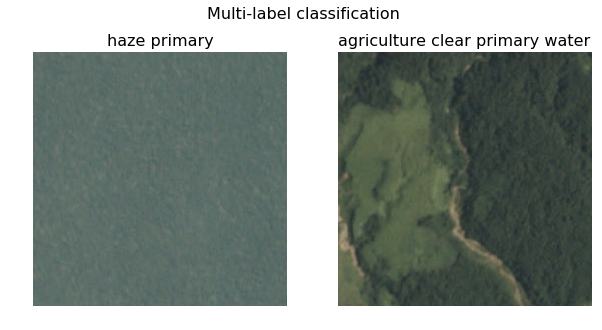

In [8]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [4]:
metrics=[f2]
sz=64
f_model = resnet34

In [5]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [6]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [8]:
data = get_data(sz)

In [14]:
data = data.resize(int(sz*1.3), 'tmp')

# This is a convenience function to speed up resizing the images.
# If the images are very large it can take longer to resize them than it does to train the neural network.

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [9]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

In [25]:
lr = 0.2

In [17]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.14955 0.13571 0.87877]                            
[1.      0.13947 0.12939 0.88479]                            
[2.      0.13545 0.12796 0.88652]                            
[3.      0.13879 0.12811 0.88472]                            
[4.      0.1336  0.12602 0.88768]                            
[5.      0.12795 0.12407 0.89019]                            
[6.      0.13106 0.12411 0.89024]                            



In [26]:
lrs = np.array([lr/9,lr/3,lr])

In [19]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.12091 0.11425 0.90073]                            
[1.      0.11685 0.10903 0.90698]                            
[2.      0.10858 0.10522 0.90839]                            
[3.      0.11037 0.105   0.90974]                            
[4.      0.10548 0.10342 0.9114 ]                            
[5.      0.10021 0.10104 0.91316]                             
[6.      0.10169 0.10071 0.9129 ]                             



In [20]:
learn.save(f'{sz}')

In [21]:
sz=128

In [22]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.09763 0.09903 0.91407]                             
[1.      0.09679 0.09666 0.91644]                             
[2.      0.09479 0.09653 0.9162 ]                             
  9%|▉         | 45/506 [00:05<00:54,  8.41it/s, loss=0.0952]

KeyboardInterrupt: 

In [23]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  5%|▌         | 27/506 [00:09<02:51,  2.79it/s, loss=0.101]

Exception in thread Thread-24:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[0.      0.09642 0.09075 0.92311]                             
[1.      0.09281 0.09082 0.92129]                             
[2.      0.0884  0.08772 0.92611]                             
[3.      0.09368 0.08962 0.92487]                             
[4.      0.0874  0.0891  0.92471]                             
[5.      0.08539 0.08755 0.92703]                             
[6.      0.08578 0.08738 0.92573]                             



In [23]:
sz=256

In [27]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.08796 0.09196 0.92195]                             
[1.      0.09044 0.09095 0.92239]                             
[2.      0.08651 0.09092 0.92254]                             
[3.      0.08796 0.09098 0.92437]                             
  6%|▌         | 28/506 [00:12<03:30,  2.27it/s, loss=0.0878]

KeyboardInterrupt: 

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  1%|          | 4/506 [00:05<11:15,  1.35s/it, loss=0.0885] 


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 60%|██████    | 305/506 [06:12<04:05,  1.22s/it, loss=0.0882]

In [ ]:
log_preds,y = learn.TTA(is_test=True)
# preds = np.mean(np.exp(log_preds),0)

In [ ]:
test_fnames = data.test_ds.fnames
classes = np.array(data.classes)

In [ ]:
res = [ " ".join(classes[np.where(pp > 0.2)]) for pp in log_preds[0] ]  # python list comprehension

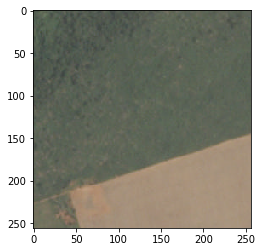

In [53]:
# img = plt.imread(f'{PATH}{learn.data.test_ds.fnames[2]}')
# plt.imshow(img);

In [ ]:
df = pd.DataFrame(res)
df.insert(0, 'image_name', [o[9:-4] for o in test_fnames])
df.columns = ['image_name', 'tags']
df.head()

In [ ]:
filename="resnet34_128v2"

In [ ]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(SUBM+filename, index=False)

In [ ]:
!kg submit {SUBM+filename} -c planet-understanding-the-amazon-from-space